In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import tensorflow
tensorflow.keras.__version__
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd 
import datetime
import numpy as np

In [2]:
# import csv
df = pd.read_csv("HR_Mockdata.csv")
# drop columns not included in analysis
df = df.drop(columns=['country_home', 'country_host', 'end_date','fired_quit'])

# convert date columns to datetime
date_columns = ['hire_date', 'move_date']
for date in date_columns:
    df[date] =  pd.to_datetime(df[date], errors='coerce', dayfirst=True, 
                                                      yearfirst=False, format=None)
# find number of days between hire and move and convert to numerical value
df['years_spend_company'] =  round(((df['move_date'] - df['hire_date']).dt.days)/365)

# drop datetime columns
df = df.drop(columns=['move_date', 'hire_date'])

# Drop null columns/rows
df = df.dropna(axis='columns', how='all')
df = df.dropna()
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,promotion_last_5years,salary,leader_host,culture_home,culture_host,function_host,business Size_host,economic Perspective_host,buzz_bust,years_spend_company
14994,0.50,0.57,2,151,0,0,low,key talent,egalitarian,egalitarian,finance,united states,positive,buzz,5.0
14995,0.37,0.48,2,160,0,0,low,consistent,consensual,egalitarian,commercial,united states,positive,buzz,7.0
14996,0.37,0.53,2,143,0,0,low,consistent,egalitarian,egalitarian,finance,sbu,positive,buzz,3.0
14997,0.50,0.96,6,280,0,0,low,key talent,hierarquical,egalitarian,operations,united states,positive,buzz,6.0
14998,0.37,0.52,2,158,0,0,low,consistent,egalitarian,egalitarian,commercial,united states,positive,buzz,6.0


In [3]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'Work_accident', 'promotion_last_5years',
       'salary', 'leader_host', 'culture_home', 'culture_host',
       'function_host', 'business Size_host', 'economic Perspective_host',
       'buzz_bust', 'years_spend_company'],
      dtype='object')

In [4]:
# rearrange the columns
df = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'years_spend_company','Work_accident', 'promotion_last_5years',
       'salary', 'leader_host', 'culture_home', 'culture_host',
       'function_host', 'business Size_host', 'economic Perspective_host',
       'buzz_bust']]
df.tail(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,years_spend_company,Work_accident,promotion_last_5years,salary,leader_host,culture_home,culture_host,function_host,business Size_host,economic Perspective_host,buzz_bust
14994,0.50,0.57,2,151,5.0,0,0,low,key talent,egalitarian,egalitarian,finance,united states,positive,buzz
14995,0.37,0.48,2,160,7.0,0,0,low,consistent,consensual,egalitarian,commercial,united states,positive,buzz
14996,0.37,0.53,2,143,3.0,0,0,low,consistent,egalitarian,egalitarian,finance,sbu,positive,buzz
14997,0.50,0.96,6,280,6.0,0,0,low,key talent,hierarquical,egalitarian,operations,united states,positive,buzz
14998,0.37,0.52,2,158,6.0,0,0,low,consistent,egalitarian,egalitarian,commercial,united states,positive,buzz


# Data Explore

In [5]:
df['buzz_bust'].value_counts()

buzz    10615
bust     2795
Name: buzz_bust, dtype: int64

In [6]:
df.groupby('buzz_bust').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,years_spend_company,Work_accident,promotion_last_5years
buzz_bust,,,,,,,
bust,0.628483,0.714683,3.773882,201.871199,6.307692,0.141324,0.019320
buzz,0.630999,0.716054,3.809232,200.905699,8.546020,0.144324,0.022044


In [7]:
df.groupby(['culture_host','buzz_bust']).agg({'buzz_bust': 'count'})

buzz_bust
culture_host buzz_bust           
consensual   bust              10
             buzz              29
egalitarian  bust            2752
             buzz           10456
hierarquical bust              21
             buzz              94
top-down     bust              12
             buzz              36

In [8]:
df.groupby('function_host').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,years_spend_company,Work_accident,promotion_last_5years,salary,leader_host,culture_home,culture_host,business Size_host,economic Perspective_host,buzz_bust
function_host,,,,,,,,,,,,,,
bts,171,171,171,171,171,171,171,171,171,171,171,171,171,171
commercial,4197,4197,4197,4197,4197,4197,4197,4197,4197,4197,4197,4197,4197,4197
communication,387,387,387,387,387,387,387,387,387,387,387,387,387,387
compliance,172,172,172,172,172,172,172,172,172,172,172,172,172,172
finance,1671,1671,1671,1671,1671,1671,1671,1671,1671,1671,1671,1671,1671,1671
human resources,1027,1027,1027,1027,1027,1027,1027,1027,1027,1027,1027,1027,1027,1027
legal,214,214,214,214,214,214,214,214,214,214,214,214,214,214
market access,428,428,428,428,428,428,428,428,428,428,428,428,428,428
marketing,2445,2445,2445,2445,2445,2445,2445,2445,2445,2445,2445,2445,2445,2445


([<matplotlib.patches.Wedge at 0x22d22ae88d0>,
 [Text(0.2377691174806913, -1.0739952731611315, 'buzz'),
  Text(-0.28099992553222747, 1.2692671278540555, 'bust')],
 [Text(0.12969224589855888, -0.5858156035424352, '79.2%'),
  Text(-0.17292303109675533, 0.7810874632948032, '20.8%')])

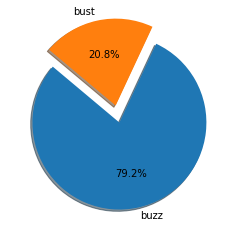

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

labels = ['buzz','bust']
sizes = df['buzz_bust'].value_counts()
explode = (0,0.2)
plt.pie(sizes, explode=explode, labels=labels,autopct="%1.1f%%", shadow=True, startangle=140)

In [10]:
df.groupby(['years_spend_company','buzz_bust']).agg({'buzz_bust': 'count'})

buzz_bust
years_spend_company buzz_bust           
0.0                 bust             258
                    buzz             215
1.0                 bust             473
                    buzz             383
2.0                 bust             258
                    buzz             680
3.0                 bust             215
                    buzz             890
4.0                 bust             129
                    buzz             638
5.0                 bust             215
                    buzz             983
6.0                 bust             215
                    buzz            1066
7.0                 bust             129
                    buzz             730
8.0                 bust             258
                    buzz             515
9.0                 bust              86
                    buzz             602
10.0                bust              86
                    buzz             301
11.0                buzz             516
12.0                buzz             602
13.0                bust             129
                    buzz             559
14.0                bust              43
                    buzz             301
15.0                bust              43
                    buzz             215
16.0                bust              43
                    buzz             473
17.0                bust              43
                    buzz              86
18.0                buzz              86
19.0                bust              86
                    buzz             215
20.0                buzz             172
21.0                buzz              43
22.0                buzz              86
23.0                buzz              86
24.0                bust              43
                    buzz              86
25.0                buzz              43
27.0                buzz              43
35.0                bust              43

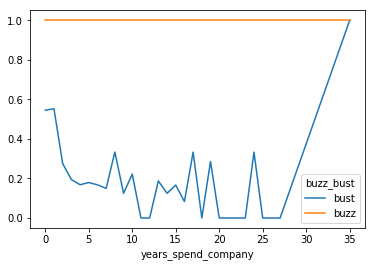

In [11]:
# df.buzz_bust
# pd.crosstab(df.years_spend_company,df.buzz_bust).plot(kind='line')
# plt.title('Turnover Frequency for Department')
# plt.xlabel('Years spend in company')
# plt.ylabel('Frequency of Turnover')
# # plt.savefig('department_bar_chart')

table=pd.crosstab(df.years_spend_company,df.buzz_bust)
table.div(table.sum(1).astype(float), axis=0).plot(kind='line', stacked=True)

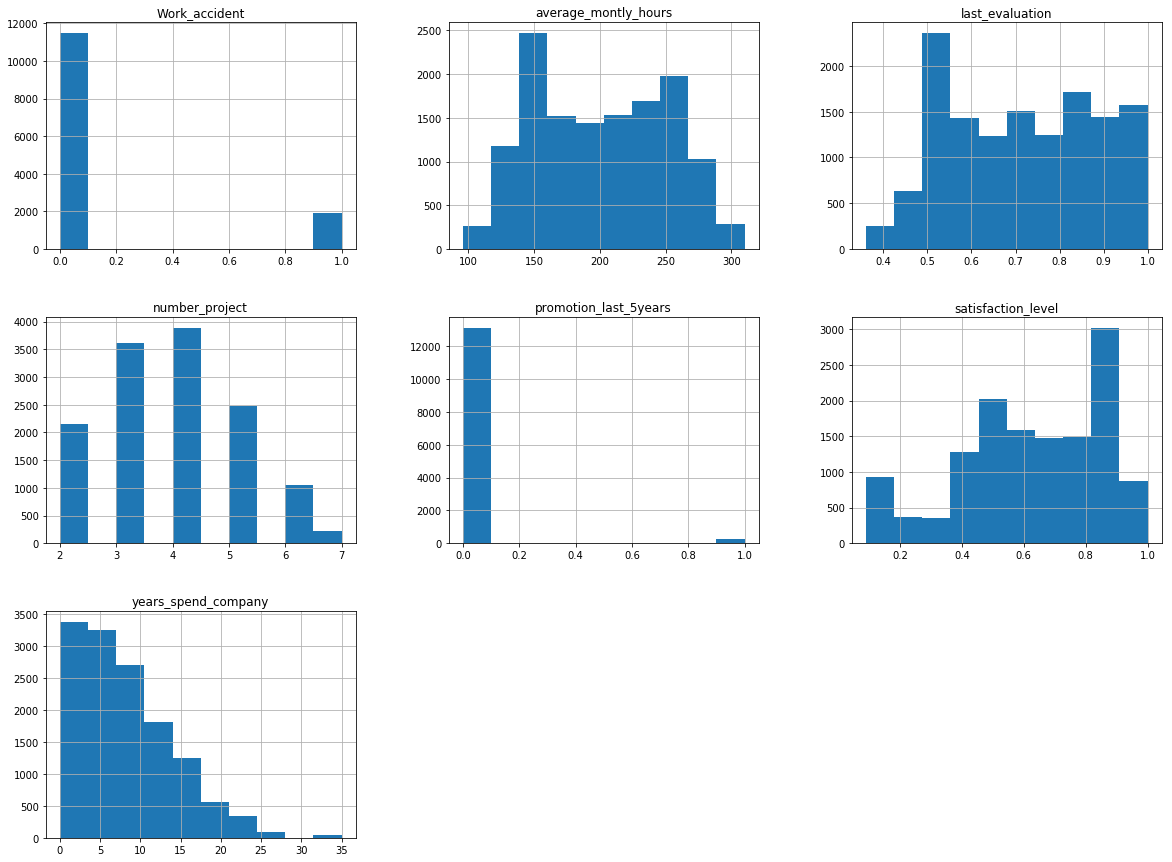

In [12]:
num_bins = 10

df.hist(bins=num_bins, figsize=(20,15))
# plt.savefig("hr_histogram_plots")
plt.show()

In [13]:
# list(df.columns.values)
df.shape

(13410, 15)

## Create dummy variables for categorical variables

In [14]:
# select column names that need to be converted to dummy variables
to_dummify = [
 'salary',
 'leader_host',
 'culture_home',
 'culture_host',
 'economic Perspective_host',
 'business Size_host', 
 'function_host'
 ]

In [15]:
for dummy in to_dummify:
    df = pd.concat([df.drop(dummy, axis=1), pd.get_dummies(df[dummy], drop_first=True,
                prefix=dummy)], axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,years_spend_company,Work_accident,promotion_last_5years,buzz_bust,salary_low,salary_medium,...,function_host_communication,function_host_compliance,function_host_finance,function_host_human resources,function_host_legal,function_host_market access,function_host_marketing,function_host_medical,function_host_operations,function_host_regulatory affairs
0,0.38,0.53,2,157,14.0,0,0,bust,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.90,0.86,5,262,10.0,0,0,bust,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0.11,0.88,7,272,8.0,0,0,bust,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.75,0.87,5,223,2.0,0,0,bust,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.37,0.52,2,159,13.0,0,0,bust,1,0,...,0,0,0,0,0,0,0,0,0,0


## split data into train and test (save  header here)

In [16]:
X = df.drop("buzz_bust", axis=1)

# save column names of X to a list for later use
feature_names = X.columns.tolist()
feature_names

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'years_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'salary_low',
 'salary_medium',
 'leader_host_key talent',
 'leader_host_poor perfomer',
 'leader_host_well placed talent',
 'culture_home_egalitarian',
 'culture_home_hierarquical',
 'culture_home_top-down',
 'culture_host_egalitarian',
 'culture_host_hierarquical',
 'culture_host_top-down',
 'economic Perspective_host_neutral',
 'economic Perspective_host_positive',
 'business Size_host_mbu',
 'business Size_host_sbu',
 'business Size_host_united states',
 'function_host_commercial',
 'function_host_communication',
 'function_host_compliance',
 'function_host_finance',
 'function_host_human resources',
 'function_host_legal',
 'function_host_market access',
 'function_host_marketing',
 'function_host_medical',
 'function_host_operations',
 'function_host_regulatory affairs']

In [17]:
# Convert X, y to arrays
X = df.drop("buzz_bust", axis=1).values
y = df["buzz_bust"].values
print(X.shape, y.shape)

(13410, 34) (13410,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    random_state=1, stratify=y)

## Data Pre-processing

In [19]:
# Create a StandardScater model and fit it to the training data
X_scaler = MinMaxScaler().fit(X_train)

In [20]:
# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
# rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train_categorical)
train_score = rf.score(X_train_scaled, y_train_categorical)
train_score

C:\Users\h4wth\Anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9899572437108481

In [23]:
test_score = rf.score(X_test_scaled, y_test_categorical)
print('Random Forest Accuracy: {:.3f}'.format(test_score))

Random Forest Accuracy: 0.850


In [24]:
import pickle
with open('Output/turnover_rf_model_trained.pickle', 'wb') as f:
    pickle.dump(rf, f)
    

In [25]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([1.03119069e-01, 1.16665662e-01, 5.15832474e-02, 1.43836046e-01,
       2.81504249e-01, 1.29776650e-02, 4.55346515e-03, 1.59419301e-02,
       1.42922465e-02, 1.47910737e-02, 3.81361223e-03, 1.82503370e-02,
       2.41394868e-02, 2.80397800e-02, 8.64409470e-03, 2.10740345e-03,
       1.54375484e-03, 4.48213681e-04, 1.50722105e-03, 8.28037379e-04,
       2.31399011e-04, 1.67110084e-02, 1.56031310e-02, 2.19693780e-02,
       4.32908265e-03, 3.52941982e-03, 1.63706103e-02, 1.00726488e-02,
       5.32661355e-03, 7.96544159e-03, 2.21354036e-02, 8.07028747e-03,
       1.46764403e-02, 4.42254052e-03])

In [26]:
# We can evaluate the features by their importance
rf_feature_importance = list(zip(feature_names,rf.feature_importances_))
rf_feature_importance
# rf_feature_importance_df = pd.DataFrame(list(zip(rf.feature_importances_, feature_names)), 
#                columns =['Name', 'val']) 
# dict = {'name': nme, 'degree': deg, 'score': scr}  
    
# rf_feature_importance_df = pd.DataFrame(rf_feature_importance) 

# rf_feature_importance_df = pd.DataFrame(rf_feature_importance, columns = ['feature', 'feature_importance']) 
# rf_feature_importance_df = pd.DataFrame(rf_feature_importance) 

[('satisfaction_level', 0.10311906920386953),
 ('last_evaluation', 0.11666566171203248),
 ('number_project', 0.05158324743291191),
 ('average_montly_hours', 0.143836046366352),
 ('years_spend_company', 0.28150424865401436),
 ('Work_accident', 0.012977664953931147),
 ('promotion_last_5years', 0.004553465149300831),
 ('salary_low', 0.015941930096097255),
 ('salary_medium', 0.014292246492772045),
 ('leader_host_key talent', 0.014791073746786112),
 ('leader_host_poor perfomer', 0.0038136122309552463),
 ('leader_host_well placed talent', 0.018250337018940528),
 ('culture_home_egalitarian', 0.02413948680312106),
 ('culture_home_hierarquical', 0.02803978004909987),
 ('culture_home_top-down', 0.008644094701483744),
 ('culture_host_egalitarian', 0.0021074034485710678),
 ('culture_host_hierarquical', 0.0015437548424734604),
 ('culture_host_top-down', 0.00044821368125696765),
 ('economic Perspective_host_neutral', 0.0015072210524041322),
 ('economic Perspective_host_positive', 0.00082803737879168

# Neural Network

## Create Our Model

In [27]:
# determine input_dim for model
input_dim = len(list(df.columns.values))-1

# create model
model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=input_dim))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 210       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 14        
Total params: 266
Trainable params: 266
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 1s - loss: 0.5467 - acc: 0.7757
Epoch 2/100
 - 0s - loss: 0.5077 - acc: 0.7916
Epoch 3/100
 - 0s - loss: 0.5012 - acc: 0.7916
Epoch 4/100
 - 0s - loss: 0.4941 - acc: 0.7916
Epoch 5/100
 - 0s - loss: 0.4874 - acc: 0.7916
Epoch 6/100
 - 0s - loss: 0.4813 - acc: 0.7916
Epoch 7/100
 - 0s - loss: 0.4750 - acc: 0.7917
Epoch 8/100
 - 0s - loss: 0.4696 - acc: 0.7909
Epoch 9/100
 - 1s - loss: 0.4646 - acc: 0.7899
Epoch 10/100
 - 1s - loss: 0.4596 - acc: 0.7890
Epoch 11/100
 - 1s - loss: 0.4551 - acc: 0.7909
Epoch 12/100
 - 0s - loss: 0.4521 - acc: 0.7911
Epoch 13/100
 - 0s - loss: 0.4489 - acc: 0.7939
Epoch 14/100
 - 0s - loss: 0.4448 - acc: 0.7988
Epoch 15/100
 - 0s - loss: 0.4416 - acc: 0.8013
Epoch 16/100
 - 0s - loss: 0.4383 - acc: 0.8059
Epoch 17/100
 - 1s - loss: 0.4349 - acc: 0.8070
Epoch 18/100
 - 1s - loss: 0.4311 - acc: 0.8103
Epoch 19/100
 - 0s - loss: 0.4267 - acc: 0.8102
Epoch 20/100
 - 1s - loss: 0.4236 - acc: 0.8128
E

## Save the model

In [31]:
# Save the model
model.save("Output/turnover_neural_model_trained.h5")

## Loading the model

In [32]:
# Load the model
from tensorflow.keras.models import load_model
turnover_neural_model = load_model("Output/turnover_neural_model_trained.h5")

## Evaluate the model

In [33]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

 - 0s - loss: 0.3559 - acc: 0.8324
Normal Neural Network - Loss: 0.3558760398080589, Accuracy: 0.8323888778686523


## Use the model for new predictions

In [34]:
input_data = {
 'satisfaction_level': 0.09,
 'last_evaluation': 0.89,
 'number_project': 6,
 'average_montly_hours': 276,
 'years_spend_company': 4,
 'Work_accident': 0,
 'promotion_last_5years': 0,
 'salary': 'low',
 'leader_host': 'well placed talent',
 'culture_home': 'hierarquical',
 'culture_host': 'hierarquical',
 'function_host': 'marketing',
 'business Size_host': 'lbu',
 'economic Perspective_host': 'positive'
    }


In [35]:
input_data_df = pd.DataFrame.from_dict(input_data, orient='index').T
input_data_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,years_spend_company,Work_accident,promotion_last_5years,salary,leader_host,culture_home,culture_host,function_host,business Size_host,economic Perspective_host
0,0.09,0.89,6,276,4,0,0,low,well placed talent,hierarquical,hierarquical,marketing,lbu,positive


In [36]:
# select column names that need to be converted to dummy variables
to_dummify = [
 'salary',
 'leader_host',
 'culture_home',
 'culture_host',
 'economic Perspective_host',
 'business Size_host', 
 'function_host'
 ]

for dummy in to_dummify:
    dummy = pd.get_dummies(input_data_df[dummy],prefix=dummy)
    input_data_df = pd.concat([input_data_df,dummy],axis=1)
input_data_df = input_data_df.drop(columns=to_dummify)
input_data_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'years_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary_low', 'leader_host_well placed talent',
       'culture_home_hierarquical', 'culture_host_hierarquical',
       'economic Perspective_host_positive', 'business Size_host_lbu',
       'function_host_marketing'],
      dtype='object')

In [37]:
# Get missing columns 
missing_cols = set( feature_names ) - set( input_data_df.columns )
missing_cols


{'business Size_host_mbu',
 'business Size_host_sbu',
 'business Size_host_united states',
 'culture_home_egalitarian',
 'culture_home_top-down',
 'culture_host_egalitarian',
 'culture_host_top-down',
 'economic Perspective_host_neutral',
 'function_host_commercial',
 'function_host_communication',
 'function_host_compliance',
 'function_host_finance',
 'function_host_human resources',
 'function_host_legal',
 'function_host_market access',
 'function_host_medical',
 'function_host_operations',
 'function_host_regulatory affairs',
 'leader_host_key talent',
 'leader_host_poor perfomer',
 'salary_medium'}

In [38]:
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    input_data_df[c] = 0
input_data_df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,years_spend_company,Work_accident,promotion_last_5years,salary_low,leader_host_well placed talent,culture_home_hierarquical,...,culture_home_top-down,business Size_host_united states,function_host_commercial,function_host_finance,function_host_compliance,function_host_human resources,leader_host_key talent,function_host_operations,culture_host_top-down,business Size_host_mbu
0,0.09,0.89,6,276,4,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Ensure the order of column in the test set is in the same order than in train set
input_data_df = input_data_df[feature_names]
input_data_df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,years_spend_company,Work_accident,promotion_last_5years,salary_low,salary_medium,leader_host_key talent,...,function_host_communication,function_host_compliance,function_host_finance,function_host_human resources,function_host_legal,function_host_market access,function_host_marketing,function_host_medical,function_host_operations,function_host_regulatory affairs
0,0.09,0.89,6,276,4,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [40]:
X_input = input_data_df.values
X_input_scaled = X_scaler.transform(X_input)
X_input_scaled.shape


(1, 34)

In [41]:
print(f"Predicted result ([1] stay/[0] leave): {turnover_neural_model.predict_classes(X_input_scaled)}")



Predicted result ([1] stay/[0] leave): [1]


In [42]:
# Grab just one data point to test with
predict_summary = []
real_summary = []
j = 0
for i in range (500):
    test = np.expand_dims(X_test_scaled[i], axis=0)
    result = model.predict_classes(test)
    predict_summary.append(result.item(0))
    real_result = y_test_categorical[i].item(1)
    real_summary.append(real_result)
    if result == real_result:
        j = j+1
# real_summary
print(j)



# plot the predict and real value



413
